# Prep set

In [1]:
import pandas as pd
import ast
import json
import subprocess as sb
import numpy as np

In [2]:
data="data.json"
data="just_restaurants.json"
with open(data, 'r') as r:
    i=0
    lines=[]
    for x in r:
        lines.append(pd.DataFrame([json.loads(x)]))
        i+=1
        if i%10000==0:
            print(i)
    res=pd.concat(lines)

10000
20000
30000
40000
50000
60000
70000
80000
90000
100000
110000
120000
130000
140000
150000
160000
170000


In [3]:
res['business_review_count']=res['business_id'].map(lambda x: x['review_count'])

In [4]:
res['attributes_count']=res['business_id'].map(lambda x: len(x['attributes']))

In [5]:
row=(dict(res[['attributes_count']].reset_index().iterrows())[0])
for x in row:
    print(x)

0
24


In [6]:
row[1]

24

In [7]:
res.index=pd.RangeIndex(len(res))

In [8]:
res.count()

business_id              177358
cool                     177358
date                     177358
funny                    177358
incorrect_words          177358
review_id                177358
stars                    177358
text                     177358
useful                   177358
user_id                  177358
words                    177358
business_review_count    177358
attributes_count         177358
dtype: int64

In [9]:
pd.set_option('display.max_rows', 10)
res.groupby('cool').count()

,business_id,date,funny,incorrect_words,review_id,stars,text,useful,user_id,words,business_review_count,attributes_count
cool,,,,,,,,,,,,
0,118710,118710,118710,118710,118710,118710,118710,118710,118710,118710,118710,118710
1,34790,34790,34790,34790,34790,34790,34790,34790,34790,34790,34790,34790
2,11775,11775,11775,11775,11775,11775,11775,11775,11775,11775,11775,11775
3,5025,5025,5025,5025,5025,5025,5025,5025,5025,5025,5025,5025
4,2446,2446,2446,2446,2446,2446,2446,2446,2446,2446,2446,2446
...,...,...,...,...,...,...,...,...,...,...,...,...
167,1,1,1,1,1,1,1,1,1,1,1,1
170,1,1,1,1,1,1,1,1,1,1,1,1
172,1,1,1,1,1,1,1,1,1,1,1,1


In [10]:
res.groupby('useful').count()

,business_id,cool,date,funny,incorrect_words,review_id,stars,text,user_id,words,business_review_count,attributes_count
useful,,,,,,,,,,,,
0,70289,70289,70289,70289,70289,70289,70289,70289,70289,70289,70289,70289
1,45240,45240,45240,45240,45240,45240,45240,45240,45240,45240,45240,45240
2,24717,24717,24717,24717,24717,24717,24717,24717,24717,24717,24717,24717
3,13500,13500,13500,13500,13500,13500,13500,13500,13500,13500,13500,13500
4,7824,7824,7824,7824,7824,7824,7824,7824,7824,7824,7824,7824
...,...,...,...,...,...,...,...,...,...,...,...,...
168,1,1,1,1,1,1,1,1,1,1,1,1
170,1,1,1,1,1,1,1,1,1,1,1,1
173,1,1,1,1,1,1,1,1,1,1,1,1


In [11]:
res.groupby('funny').count()

,business_id,cool,date,incorrect_words,review_id,stars,text,useful,user_id,words,business_review_count,attributes_count
funny,,,,,,,,,,,,
0,127048,127048,127048,127048,127048,127048,127048,127048,127048,127048,127048,127048
1,28280,28280,28280,28280,28280,28280,28280,28280,28280,28280,28280,28280
2,9896,9896,9896,9896,9896,9896,9896,9896,9896,9896,9896,9896
3,4505,4505,4505,4505,4505,4505,4505,4505,4505,4505,4505,4505
4,2438,2438,2438,2438,2438,2438,2438,2438,2438,2438,2438,2438
...,...,...,...,...,...,...,...,...,...,...,...,...
260,1,1,1,1,1,1,1,1,1,1,1,1
414,1,1,1,1,1,1,1,1,1,1,1,1
487,1,1,1,1,1,1,1,1,1,1,1,1


In [12]:
res['text'].loc[2]

'interesting cave like setting.  busy, but way overpriced for what it is.  nothing special or memorable about the steaks or sides. average quality food. average service, nothing special to stand out from any other restaurant. hyped name.  professional host greeting.'

In [13]:
res[res['text'].isnull()]

,business_id,cool,date,funny,incorrect_words,review_id,stars,text,useful,user_id,words,business_review_count,attributes_count


In [14]:
# number of words
pd.set_option('display.max_rows', 800)
res.groupby(lambda a: len(res['text'].loc[a].split(' '))).count()

,business_id,cool,date,funny,incorrect_words,review_id,stars,text,useful,user_id,words,business_review_count,attributes_count
1,10,10,10,10,10,10,10,10,10,10,10,10,10
2,28,28,28,28,28,28,28,28,28,28,28,28,28
3,21,21,21,21,21,21,21,21,21,21,21,21,21
4,50,50,50,50,50,50,50,50,50,50,50,50,50
5,79,79,79,79,79,79,79,79,79,79,79,79,79
6,156,156,156,156,156,156,156,156,156,156,156,156,156
7,224,224,224,224,224,224,224,224,224,224,224,224,224
8,273,273,273,273,273,273,273,273,273,273,273,273,273
9,375,375,375,375,375,375,375,375,375,375,375,375,375
10,414,414,414,414,414,414,414,414,414,414,414,414,414


In [15]:
# review_counts
#res.groupby('business_review_count').count()
res[res['business_review_count']>50].count()

business_id              127301
cool                     127301
date                     127301
funny                    127301
incorrect_words          127301
                          ...  
useful                   127301
user_id                  127301
words                    127301
business_review_count    127301
attributes_count         127301
Length: 13, dtype: int64

In [16]:
res.groupby('attributes_count').count()
res[res['attributes_count']>10].count()

business_id              132341
cool                     132341
date                     132341
funny                    132341
incorrect_words          132341
                          ...  
useful                   132341
user_id                  132341
words                    132341
business_review_count    132341
attributes_count         132341
Length: 13, dtype: int64

In [17]:
pd.set_option('display.max_rows', 0)

In [18]:
res['business_id'].loc[2]['stars']

4.0

In [19]:
n=res[res['business_review_count']>50].count()[0]
print(n)
#print(type(n))
#rs=res[res['business_review_count']>50].sample(n=n).copy()
#pos=rs[rs[like_type]>2].sample(n=40000).copy()

127301


In [20]:
#res[lambda r: True].sample(n=1) #??
#res[print(res['business'])]#
#res[print(type(res['business']))]
#res.apply()
#res[res['business'].get('business_id')=='aAbL_y05zPWaIrT1QtDWxw'].sample(n=1)

In [21]:
def get_reviews(like_type):
    n=res[res['business_review_count']>50].count()[0]
    #print(n)
    #print(type(n))
    tmp=res[res['business_review_count']>50].sample(n=n).copy()
    n=tmp[tmp['attributes_count']>10].count()[0]
    rs=tmp[tmp['attributes_count']>10].sample(n=n).copy()

    pos=rs[rs[like_type]>2].sample(n=10000).copy()
    pos['classification']=like_type
    neg=rs[rs[like_type]==0].sample(n=10000).copy()
    neg['classification']='not-'+like_type
    all=pd.concat([pos, neg])
    all=all[['text', like_type, 'classification', 'stars', 'business_id', 'words', 'incorrect_words']].reset_index(drop=True)
    return all

# Classification

In [22]:
import nltk
toker=nltk.tokenize.TweetTokenizer()

In [23]:
like_type='useful'
#like_type='funny'
#like_type='cool'

In [24]:
reviews=get_reviews(like_type)

In [25]:
texts_tokenized = (toker.tokenize(row.text) for index, row in reviews.iterrows())
all_words = nltk.FreqDist(w.lower() for tokens in texts_tokenized for w in tokens)

print('total number of words:', sum(all_words.values()))
print('unique words:', len(all_words))
print('words present only once:', sum(c for c in all_words.values() if c == 1))

all_words.plot(30)

total number of words: 3525175
unique words: 50016
words present only once: 24200


<Figure size 640x480 with 1 Axes>

feature words: 25400


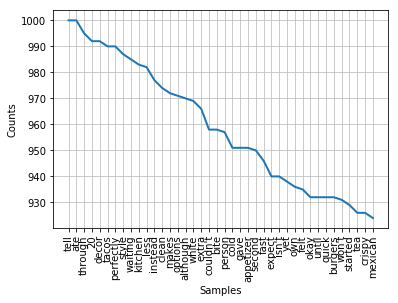

In [26]:
words = all_words.copy()
for w, count in all_words.items():
    if count > 1000 or count == 1:
        del words[w]

print('feature words:', len(words))
words.plot(40)

feature words: 4616


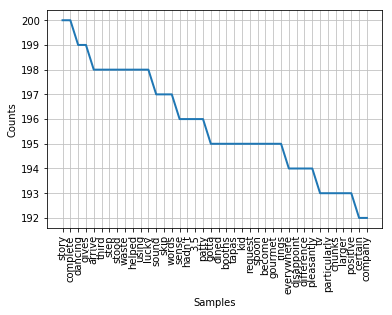

In [27]:
top_words = words.copy()
for w, count in all_words.items():
    if count > 200 or count <= 20:
        del top_words[w]

print('feature words:', len(top_words))
top_words.plot(40)
top_words=frozenset(top_words.keys())

In [28]:
word_features = frozenset(words.keys())
i=0
words_numbered=dict()
for w in word_features:
    words_numbered[w]=i
    i+=1

In [29]:
len(word_features)

25400

In [30]:
def doc2vec(text):
    return [ (i,words_numbered[w]) for i,w in enumerate(toker.tokenize(text.lower())) if w in words_numbered ]

In [31]:
import random

In [32]:
#cosine similarity
corpus = [ doc2vec(t) for t in random.sample(list(reviews[reviews['classification']=='useful']['text']), 10)]


In [33]:
from gensim.similarities.docsim import Similarity
from gensim.test.utils import get_tmpfile

In [34]:
index = Similarity(None, corpus, num_features=len(words_numbered))  # create index

/home/big_files/NPRG045/lib/python3.7/site-packages/gensim/matutils.py:718: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


In [35]:
def features(row):
    text=row.text
    txt_words = set(toker.tokenize(text.lower()))
    features = {}
    
    for w in txt_words & top_words:
        features['contains({})'.format(w)] = 'Yes' # beze slov je to lepsi
        pass
    
    for w in txt_words & word_features:
        #features['contains({})'.format(w)] = 'Yes' # beze slov je to lepsi
        pass
    
    text_tok=toker.tokenize(text.lower())
    for w,w2 in zip(text_tok[:-1], text_tok[1:]):
        if w in word_features and w2 in word_features:
                features['contains({}&&&{})'.format(w,w2)] = 'Yes'
                pass
            
    for (w,w2),w3 in zip(zip(text_tok[:-2], text_tok[1:-1]), text_tok[2:]):
        if w in word_features and w2 in word_features and w3 in word_features:
                features['contains({}&&&{}&&&{})'.format(w,w2,w3)] = 'Yes'
                pass
            
    for ((w,w2),w3),w4 in zip(zip(zip(text_tok[:-3], text_tok[1:-2]), text_tok[2:-1]), text_tok[3:]):
        if w in word_features and w2 in word_features and w3 in word_features and w4 in word_features:
                features['contains({}&&&{}&&&{}&&&{})'.format(w,w2,w3,w4)] = 'Yes'
                pass
            
            
    #features['contains(@@stars{})'.format(row.stars)] = 'Yes'
    features['@@@stars'] = row.stars
    features['@@@extreme_stars'] = False if 2 <= row.stars <= 4 else True
    features['@@@bus_stars']=row['business_id']['stars']
    #features['@@@review_count']= "A lot" if row['business']['review_count']  else "A few"
    l=row['words']
    features['@@@review_length']= "short" if l<50 else "middle" if l<150 else "long"
    features['@@@review_length50']= "short" if l<50 else "middle"
    features['@@@review_length100']= "short" if l<100 else "middle"
    features['@@@review_length150']= "short" if l<150 else "middle"
    features['@@@review_length35']= "short" if l<35 else "middle"
    features['@@@review_length75']= "short" if l<75 else "middle"
    
    rate=row['incorrect_words']/row['words']
    
    features['@@@error_rate0.02'] = "good" if rate<0.02 else "bad"
    features['@@@error_rate0.05'] = "good" if rate<0.05 else "bad"
    features['@@@error_rate0.1'] = "good" if rate<0.1 else "bad"
    features['@@@error_rate0.15'] = "good" if rate<0.15 else "bad"
    features['@@@error_rate0.2'] = "good" if rate<0.2 else "bad"
    
    
    features['@@@error_total5'] = "good" if rate<5 else "bad"
    features['@@@error_total10<'] = "good" if rate<10 else "bad"
    features['@@@error_total15'] = "good" if rate<15 else "bad"
    features['@@@error_total20'] = "good" if rate<20 else "bad"
    
    # not 100% haha
    #features['aaa'] = 'a' if row.useful > 0 else 'b'
    cos_sims = index[doc2vec(text)]
    for i,x in enumerate(cos_sims):
        features['@@@cos_sim4_{}'.format(i)]=1 if x>0.4 else 0
        features['@@@cos_sim6_{}'.format(i)]=1 if x>0.6 else 0
        features['@@@cos_sim8_{}'.format(i)]=1 if x>0.8 else 0
        features['@@@cos_sim9_{}'.format(i)]=1 if x>0.9 else 0
        features['@@@cos_sim95_{}'.format(i)]=1 if x>0.95 else 0
    
    return features

In [36]:
# generate tuples: (features_dict, sentiment)
feature_sets = [(features(row), row.classification) for index, row in reviews.iterrows()]

In [37]:
feature_sets[0]

({'@@@stars': 5,
  '@@@extreme_stars': True,
  '@@@bus_stars': 4.0,
  '@@@review_length': 'short',
  '@@@review_length50': 'short',
  '@@@review_length100': 'short',
  '@@@review_length150': 'short',
  '@@@review_length35': 'short',
  '@@@review_length75': 'short',
  '@@@error_rate0.02': 'good',
  '@@@error_rate0.05': 'good',
  '@@@error_rate0.1': 'good',
  '@@@error_rate0.15': 'good',
  '@@@error_rate0.2': 'good',
  '@@@error_total5': 'good',
  '@@@error_total10<': 'good',
  '@@@error_total15': 'good',
  '@@@error_total20': 'good',
  '@@@cos_sim4_0': 0,
  '@@@cos_sim6_0': 0,
  '@@@cos_sim8_0': 0,
  '@@@cos_sim9_0': 0,
  '@@@cos_sim95_0': 0,
  '@@@cos_sim4_1': 0,
  '@@@cos_sim6_1': 0,
  '@@@cos_sim8_1': 0,
  '@@@cos_sim9_1': 0,
  '@@@cos_sim95_1': 0,
  '@@@cos_sim4_2': 0,
  '@@@cos_sim6_2': 0,
  '@@@cos_sim8_2': 0,
  '@@@cos_sim9_2': 0,
  '@@@cos_sim95_2': 0,
  '@@@cos_sim4_3': 0,
  '@@@cos_sim6_3': 0,
  '@@@cos_sim8_3': 0,
  '@@@cos_sim9_3': 0,
  '@@@cos_sim95_3': 0,
  '@@@cos_sim4_4'

# Model training

In [38]:
    import random
    random.shuffle(feature_sets)
    half=int(len(feature_sets)/2)
    train_set, test_set = feature_sets[:half], feature_sets[half:]
    half

10000

In [39]:
classifier = nltk.NaiveBayesClassifier.train(train_set)
print(nltk.classify.accuracy(classifier, test_set))
print(nltk.classify.accuracy(classifier, train_set)) # pridani jednotlivych slov tady snizi presnost jen na 65, je to ocekavane?

0.6504
0.7674


In [40]:
classifier.show_most_informative_features(30)

Most Informative Features
           contains(7pm) = 'Yes'          useful : not-us =     20.5 : 1.0
          contains(warn) = 'Yes'          useful : not-us =     17.1 : 1.0
        contains(rudely) = 'Yes'          useful : not-us =     16.4 : 1.0
       contains(sipping) = 'Yes'          useful : not-us =     15.1 : 1.0
      contains(distinct) = 'Yes'          useful : not-us =     13.7 : 1.0
       contains(sourced) = 'Yes'          useful : not-us =     12.4 : 1.0
      contains(accurate) = 'Yes'          useful : not-us =     12.4 : 1.0
        contains(remain) = 'Yes'          useful : not-us =     11.7 : 1.0
     contains(positives) = 'Yes'          useful : not-us =     11.7 : 1.0
        contains(artist) = 'Yes'          useful : not-us =     11.7 : 1.0
    contains(industrial) = 'Yes'          useful : not-us =     11.7 : 1.0
          contains(pics) = 'Yes'          useful : not-us =     11.7 : 1.0
     contains(instantly) = 'Yes'          useful : not-us =     11.5 : 1.0

In [41]:
#classifier = nltk.DecisionTreeClassifier.train(train_set)
#print(nltk.classify.accuracy(classifier, test_set))
#print(nltk.classify.accuracy(classifier, train_set))



# get feature matrix

In [42]:

X, Y = [x[0] for x in feature_sets], [x[1] for x in feature_sets]

In [43]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_extraction.text import CountVectorizer

In [44]:
X[0]

{'contains(spending)': 'Yes',
 'contains(sent)': 'Yes',
 'contains(batter)': 'Yes',
 'contains(paired)': 'Yes',
 'contains(chris)': 'Yes',
 'contains(cant)': 'Yes',
 'contains(debating)': 'Yes',
 'contains(began)': 'Yes',
 'contains(samples)': 'Yes',
 'contains(frustrating)': 'Yes',
 'contains(history)': 'Yes',
 'contains(minimum)': 'Yes',
 'contains(pushing)': 'Yes',
 'contains(9:30)': 'Yes',
 'contains(surprising)': 'Yes',
 'contains(laughed)': 'Yes',
 'contains(arizona)': 'Yes',
 'contains(stood)': 'Yes',
 'contains(informative)': 'Yes',
 'contains(bare)': 'Yes',
 'contains(suggestions)': 'Yes',
 'contains(visiting&&&arizona)': 'Yes',
 'contains(9:30&&&pm)': 'Yes',
 'contains(basically&&&empty)': 'Yes',
 'contains(short&&&ribs)': 'Yes',
 'contains(diver&&&scallops)': 'Yes',
 'contains(bare&&&minimum)': 'Yes',
 'contains(generous&&&portion)': 'Yes',
 'contains(split&&&between)': 'Yes',
 'contains(jenn&&&kept)': 'Yes',
 '@@@stars': 5,
 '@@@extreme_stars': True,
 '@@@bus_stars': 4.5,
 

In [45]:
cv_gain = CountVectorizer(max_df=0.95, min_df=2,
                                     max_features=10000) #WTF

In [46]:
all_keys=[set(x.keys()) for x in X]

In [47]:
import functools
all_fs=functools.reduce(lambda a,b: a.union(b), all_keys)
all_fs=list(all_fs)

In [48]:
len(all_fs)

157686

In [49]:
def get_int(val):
    if isinstance(val, int):
        return val
    if isinstance(val, float):
        return val
    vals={"Yes":1, "No":0, "middle":1, "long":2, "short":0, "good":1, "bad":0}
    return vals[val]

In [50]:
#X_matrix=[]
#
#for x in X:
#    row=[]
#    for key in all_fs:
#        if key in x:
#            row.append(get_int(x[key]))
#        else:
#            row.append(0)
#    X_matrix.append(row)

In [51]:
import scipy

In [52]:
row=[]
x=X[0]

for key in all_fs:
    if key in x:
        row.append(get_int(x[key]))
    else:
        row.append(0)
        
X_matrix=scipy.sparse.lil_matrix([row])

i=0
for x in X[1:]:
    row=[]
    for key in all_fs:
        if key in x:
            row.append(get_int(x[key]))
        else:
            row.append(0)
    X_matrix=scipy.sparse.vstack((X_matrix, scipy.sparse.lil_matrix([row])), format='lil')
    i+=1
    #if i==1000:
       #break

In [53]:
len(X)

20000

In [54]:
X_matrix

<20000x157686 sparse matrix of type '<class 'numpy.float64'>'
	with 769439 stored elements in LInked List format>

## logistic regression

In [55]:
from sklearn.linear_model import LogisticRegression

In [56]:
lr=LogisticRegression()

In [57]:
half=int(len(X)/2)
print(half)

10000


In [58]:
train_set_X, test_set_X = X_matrix[:half, :], X_matrix[half:, :]
train_set_Y, test_set_Y = Y[:half], Y[half:]

In [59]:
lr.fit(train_set_X, train_set_Y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [60]:
lr.score(test_set_X, test_set_Y)

0.6862

## Dimension reduction - LSA - SVD

In [55]:
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import scale

In [56]:
svd = TruncatedSVD(n_components = 100)
#scale(X_matrix.tocsc())
svdMatrix = svd.fit_transform(X_matrix)

In [57]:
feature_set_reduced = [ (dict(enumerate(x)),y) for (x,y) in zip(svdMatrix, Y)]

In [58]:
random.shuffle(feature_set_reduced)
half=int(len(feature_sets)/2)
train_set, test_set = feature_sets[:half], feature_sets[half:]
half

10000

# training

In [59]:
classifier = nltk.NaiveBayesClassifier.train(train_set)
print(nltk.classify.accuracy(classifier, test_set))

0.6404


# get feature matrix

In [60]:

X, Y = [x[0] for x in test_set], [x[1] for x in test_set]

In [61]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_extraction.text import CountVectorizer

In [62]:
X[0]

{'contains(employee)': 'Yes',
 'contains(product)': 'Yes',
 'contains(bakery)': 'Yes',
 'contains(wants)': 'Yes',
 'contains(sister)': 'Yes',
 'contains(final)': 'Yes',
 'contains(complaints)': 'Yes',
 'contains(bakery&&&due)': 'Yes',
 'contains(particular&&&employee)': 'Yes',
 'contains(longer&&&working)': 'Yes',
 'contains(final&&&product)': 'Yes',
 '@@@stars': 4,
 '@@@extreme_stars': False,
 '@@@bus_stars': 4.0,
 '@@@review_length': 'middle',
 '@@@review_length50': 'middle',
 '@@@review_length100': 'short',
 '@@@review_length150': 'short',
 '@@@review_length35': 'middle',
 '@@@review_length75': 'short',
 '@@@error_rate0.02': 'good',
 '@@@error_rate0.05': 'good',
 '@@@error_rate0.1': 'good',
 '@@@error_rate0.15': 'good',
 '@@@error_rate0.2': 'good',
 '@@@error_total5': 'good',
 '@@@error_total10<': 'good',
 '@@@error_total15': 'good',
 '@@@error_total20': 'good',
 '@@@cos_sim4_0': 0,
 '@@@cos_sim6_0': 0,
 '@@@cos_sim8_0': 0,
 '@@@cos_sim9_0': 0,
 '@@@cos_sim95_0': 0,
 '@@@cos_sim4_1'

In [63]:
cv_gain = CountVectorizer(max_df=0.95, min_df=2,
                                     max_features=10000)

In [64]:
all_keys=[set(x.keys()) for x in X]

In [65]:
import functools
all_fs=functools.reduce(lambda a,b: a.union(b), all_keys)
all_fs=list(all_fs)

In [66]:
len(all_fs)

87267

In [67]:
def get_int(val):
    if isinstance(val, int):
        return val
    if isinstance(val, float):
        return val
    vals={"Yes":1, "No":0, "middle":1, "long":2, "short":0, "good":1, "bad":0}
    return vals[val]

In [68]:
#X_matrix=[]
#
#for x in X:
#    row=[]
#    for key in all_fs:
#        if key in x:
#            row.append(get_int(x[key]))
#        else:
#            row.append(0)
#    X_matrix.append(row)

In [69]:
import scipy

In [70]:
row=[]
x=X[0]

for key in all_fs:
    if key in x:
        row.append(get_int(x[key]))
    else:
        row.append(0)
        
X_matrix=scipy.sparse.lil_matrix([row])

i=0
for x in X[1:]:
    row=[]
    for key in all_fs:
        if key in x:
            row.append(get_int(x[key]))
        else:
            row.append(0)
    X_matrix=scipy.sparse.vstack((X_matrix, scipy.sparse.lil_matrix([row])))
    i+=1
    #if i==1000:
       #break

In [71]:
len(X)

10000

In [72]:
X_matrix

<10000x87267 sparse matrix of type '<class 'numpy.float64'>'
	with 384573 stored elements in COOrdinate format>

# information gaion

In [73]:
res_gain = list(zip(all_fs, mutual_info_classif(X_matrix, Y, discrete_features=True)))

In [74]:
#res_gain

In [75]:
[(x,y) for (x,y) in res_gain if y>0.0005]

[('contains(gonna)', 0.0008923455594123889),
 ('contains(apology)', 0.000594819424391063),
 ('contains(dough)', 0.0013299206622705284),
 ('contains(public)', 0.0006918616914158111),
 ('contains(nope)', 0.000985686435441657),
 ('contains(drizzled)', 0.0007777201748430593),
 ('contains(stays)', 0.0005988042292852515),
 ('contains(lesson)', 0.000764904112055939),
 ('contains(judge)', 0.0005710664811460773),
 ('contains(didnt)', 0.0006753385112496946),
 ('contains(pissed)', 0.0008384856882876191),
 ('contains(plentiful)', 0.0005836210102380772),
 ('contains(capacity)', 0.0011835481748933754),
 ('contains(wear)', 0.0006998308755056561),
 ('contains(describe)', 0.0009697093530604533),
 ('contains(bakery)', 0.0005760224884325503),
 ('contains(uses)', 0.0007088526016434003),
 ('contains(whipped)', 0.0009114944735862229),
 ('contains(practically)', 0.0013863736399038606),
 ('contains(coke)', 0.0007960538853946028),
 ('contains(insisted)', 0.0006534640814221189),
 ('contains(important)', 0.00148

In [76]:
[(x,y) for (x,y) in res_gain if y>0.001]

[('contains(dough)', 0.0013299206622705284),
 ('contains(capacity)', 0.0011835481748933754),
 ('contains(practically)', 0.0013863736399038606),
 ('contains(important)', 0.001480253414636359),
 ('contains(anymore)', 0.0016712115081016481),
 ('contains(ugh)', 0.0011712370187562824),
 ('contains(deliver)', 0.0011281379863600132),
 ('contains(request)', 0.001149708058530428),
 ('contains(entering)', 0.0015656905076107145),
 ('@@@stars', 0.014612316865077926),
 ('contains(history)', 0.0011331063970417502),
 ('contains(nor)', 0.0010814757647353793),
 ('contains(survive)', 0.0011835481748933754),
 ('contains(form)', 0.0015103857086550456),
 ('contains(joke)', 0.0012669747433997373),
 ('contains(dropped)', 0.0014634314786500045),
 ('contains(aside)', 0.0015785114822717359),
 ('contains(ranch)', 0.0013082433707592),
 ('contains(swing)', 0.0011245469899976018),
 ('contains(turns)', 0.0014285320662031087),
 ('contains(custard)', 0.001228479983709398),
 ('contains(earth)', 0.0017203739220499775),


In [77]:
sorted([(x,y) for (x,y) in res_gain if x[:3]=="@@@"])

[('@@@bus_stars', 0.002016452789791556),
 ('@@@cos_sim4_0', 3.124119015047999e-06),
 ('@@@cos_sim4_1', 8.881784197001252e-16),
 ('@@@cos_sim4_2', 6.909993824883158e-05),
 ('@@@cos_sim4_3', 5.167752738531768e-05),
 ('@@@cos_sim4_4', 9.026364677960745e-05),
 ('@@@cos_sim4_5', 6.953998296455467e-05),
 ('@@@cos_sim4_6', 0.004937458008249105),
 ('@@@cos_sim4_7', 6.953998296455467e-05),
 ('@@@cos_sim4_8', 0.0032051622892969693),
 ('@@@cos_sim4_9', 4.840992595938481e-10),
 ('@@@cos_sim6_0', 8.881784197001252e-16),
 ('@@@cos_sim6_1', 8.881784197001252e-16),
 ('@@@cos_sim6_2', 8.881784197001252e-16),
 ('@@@cos_sim6_3', 6.953998296455467e-05),
 ('@@@cos_sim6_4', 6.953998296455467e-05),
 ('@@@cos_sim6_5', 6.953998296455467e-05),
 ('@@@cos_sim6_6', 0.00035315414432489974),
 ('@@@cos_sim6_7', 6.953998296455467e-05),
 ('@@@cos_sim6_8', 0.0006703113371653177),
 ('@@@cos_sim6_9', 8.881784197001252e-16),
 ('@@@cos_sim8_0', 8.881784197001252e-16),
 ('@@@cos_sim8_1', 8.881784197001252e-16),
 ('@@@cos_sim